
# Lecture 17: Crystal Growth
---

So we have a sense the magnitude of the critical atom count as well as the nimber of critical clusters as a fuction of the available atoms. How do we derive a rate from this?


well if we recall

$$\beta_i+ \beta_1 = \beta_{i+1}$$

The we can write a rate equation

$$I_i[t] = n_i[t]r^+_i - n_{i+1}[t]r^-$$

where $r^+$ and $r^-$ are the forward and backwards rate. When the cluster size is constant, I = 0, and at this point


$$n_i[t]r^+_i = n_{i+1}[t]r^-$$



But this is a bit inaccurate, because once we have a critical cluster, it's removed from the "destruction" pool.

So it's helpful to count the rate of change of the number of clusters, such that

$$\frac{dn_i[t]}{dt} = I_{i-1}[t] - I_i[t] $$, where the number clusters for a give size is constant when

$$ I_{i-1}[t] = I_i[t]$$


So the first relation:

$$I_i[t] = n_i[t]r^+_i - n_{i+1}[t]r^-$$

Is only correct when when $i < i^*$, but for all $i$, we can model

$$I_i[t] = n_i^e r^+_i \left[\frac{n_i[t]}{n^e_i}-\frac{n_{i+1}[t]}{n^e_{i+1}} \right] $$


And an analytical approximation for this is dervied by Turnbull as

$$I_v = \frac{kT}{3\pi \lambda^6 \eta}\exp\left({-\frac{\Delta F_i}{kT}}\right)$$

where $\lambda$ is a length scale appoximator and $\eta$ is an effective diffusivity.



In [1]:
import sys
sys.path.append("/pithy/code/")
from pithy import *
%matplotlib inline


So this is generally what determines what the rate, the question now is where does nucleation end and crystal growth begin?

## Crystal Growth

Once we have our solid "like" surface (e.g. 0˚ contact angle surface), we can now explore _growth_ kinetics.


As with nucleation, we can look at the heat of nucleation per molecule as:

$$\Delta G_f = (T_m -T) (S_L-S_C) $$

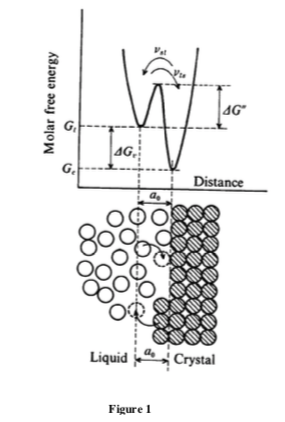


When we are below the freezing point, unless we are at 0 K, each molecule is vibrating, there is some chance that the molecule liquid jumps to a lower energy state as a solid. Boltzmann modelled this as 

$$v_{ls} = v_0 \exp\left(\frac{-\Delta G''}{kT}\right)$$

where $v_0$ is the vibrational frequency and $-\Delta G''$ is our "jump" energy barrier (not to be confused with the cluster formation penalty).

Vibration works both ways, and there is some (lower) probability that the atom jumps out

$$v_{sl} = v_0 \exp\left(\frac{-(\Delta G''+\Delta G_f)}{kT}\right)$$
$$v_{sl} = v_{ls} \exp\left(\frac{-\Delta G_f}{kT}\right)$$


If we are at a crystalline interface, each jump advances (or substracts) that section of the interface lattice parameter $a_0$, so the overall surface moves at a rate

$$u = a_0f(v_{ls}-v{sl}) = a_0 f 
v_0 \exp\left(\frac{-\Delta G''}{kT}\right) 
\left(1-\exp\left(\frac{-\Delta G_f}{kT}\right)\right)$$

This $a_0fv_0$ term is all well and good, but when we htink about atoms moving it's helpful to think in terms of diffusion, so we can relate in the liquid via 

$$D = a^2_0 v_{ls} $$

or via the Stokes Einstein relations:


$$D = \frac{kT}{2\pi a_0 \eta}$$

So we can substitute in and say:

$$u = \frac{fkT}{2\pi a_0^2 \eta}\left(1-\exp\left(\frac{-\Delta G_f}{kT}\right)\right)$$

And we get a similar competition as nucleation

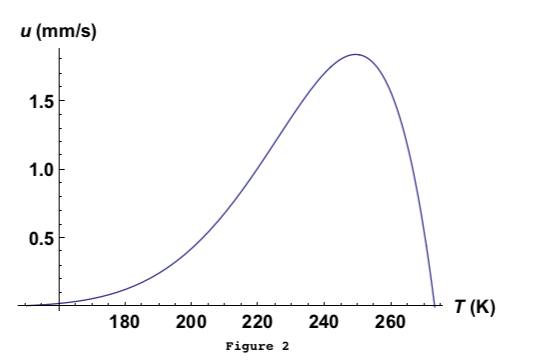

So what's the difference?

Both have similar trends, but the driving force required for the rates is very different:


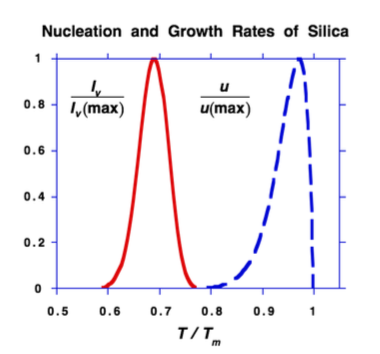

## What about the Surface Roughness?

Near the melting point:

$$\Delta G_f = (T_m - T) \Delta S_f$$

so we can express the growth rate as:

$$ u \approx \frac{f\Delta S_f}{2\pi a_0^2 \eta} (T_m - T)$$

So what is $\Delta S_f$, how can we think about this?

The change in entropy from solid to liquid -> generally we think of it as very large. But what does it mean if in one case it's large, and in one case it's small?

If we use for our definition of entropy that of order, then a large $\Delta S_f$ would be we're increasing $disorder$ greatly as we melt, and increasing it greatly when we freeze. 

Following this, a small $\Delta S_f$ indicates that we're not change the order state as much.  

So even though we're transitioning phase, the nature of the transition can be different. Let's draw a high $\Delta S_f$....


Let's draw a low $\Delta S_f$. 


(Go to Page 292)


So we get

$$\frac{\Delta G}{NkT_m} = (1-x)x\alpha + (1-x)\log(1-x) + xlog(x)$$

at the melting point where

$$ \alpha = \frac{\Delta H_f}{kT_m}\frac{\eta_L}{B}$$

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in multiply



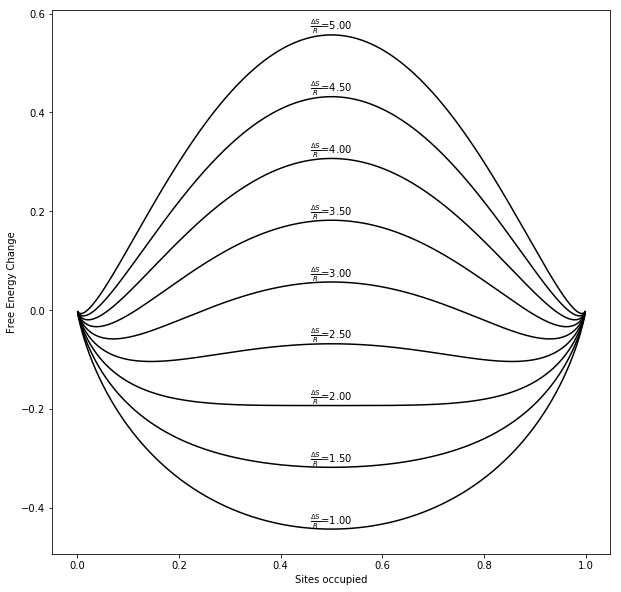

In [22]:
def G(alpha,x): return (1-x)*x*alpha+(1-x)*log(1-x)+x*log(x)

x = linspace(0,1,1000)
figure(figsize=(10,10))
for a in linspace(1,5,9): 
    plot(x,G(a,x),'k')
    annotate("$\\frac{\\Delta S}{R}$=%.2f"%a,xy=(.5,G(a,.5)+.01),ha="center")
ylabel("Free Energy Change")
xlabel("Sites occupied")
print ""

What does this mean?
Why does it follow the same form as spinodal decomposition?

How does nucelation physically proceed on a rough surface vs. a smooth surface?

Rough: stick where it can, and a balance of forces between reducing surface area and "maximizing entropy".

Smooth: We have to start "somewhere", so now it's yet another nucleation-like problem:


$$\Delta G_\text{disk} = -\pi r^2 a_0 \Delta G_V + 2 \pi r a_0 \gamma_E $$

$$\Delta G_V = \Delta G_f / a_0^3$$

$$r^* = \frac{\gamma_E}{\Delta G_V} $$

$$\Delta G_{disk}(r^*) 
= \frac{\pi a_0^4 \gamma_E^2}{\Delta G_V} 
= \frac{\pi a_0 \gamma_E^2}{\Delta G_f} $$


$$I_{disk} \approx \frac{N_S kT}{2\pi a_0^3 \eta} 
\exp\left(
\frac
{\Delta G_{disk}(r^*)}
{k_B T}
\right)$$


$$I_{disk} \approx \frac{N_S kT}{2\pi a_0^3 \eta} 
\exp\left(
\frac
{-\pi a_0^4\gamma_E^2/(S_L-S_C)}
{k_B T(T_m-T)}
\right)$$

So once again, more undercooling helps push along this event. Note that this is not a penalty so much as an incentive to stop moving. The motion of chem and physisorb molecules on surfaces is a significant topic of current research, and understanding and exploiting this behavior to control growth and to enhance catalysis is industrially releveant


But! Are surfaces perfect? No! What happens on an edge dislocation?





What about a screw?


## Kinetics of a Phase Transformation

We now have a framework to study the onset and rate of nucleation and growth. But as we transform phase, what doe the overall rate look like.

When we consider chemical reactions, in a well stirred system if the kinetics are good and the driving force is sufficient it goes quickly to completion.

But imagine this: per Scherer

>Suppose that a liquid is suddenly cooled and then held at a temperature below its melting point (or liquidus). How can we predict the amount of crystalline material that forms as a function of time?

That is to say: would it be linear? Why or why not?

Let's come up with a model. At a _fixed temperature_, we can  say in a volume  V that the amount of solid will present will be

$$V_C = VI_V(t')dt' $$


Or: the solid is converted from liquid over time at rate $I_V$.

Assuming the crystal grows as a sphere,

$$V_C = \frac{4}{3}\pi u^3(t-t')^3$$
$$dV_C = \frac{4}{3}\pi u^3(t-t')^3 VI_V(t')dt' $$

$$V_c(t) =\int_0^t \frac{4}{3}\pi u^3(t-t')^3VI_V(t')dt'$$


$$\frac{V_C}{V} = \frac{\pi}{3}I_vu^3t^4$$

So this looks like, as a function of T

Text(0,0.5,'Transformation Extent')

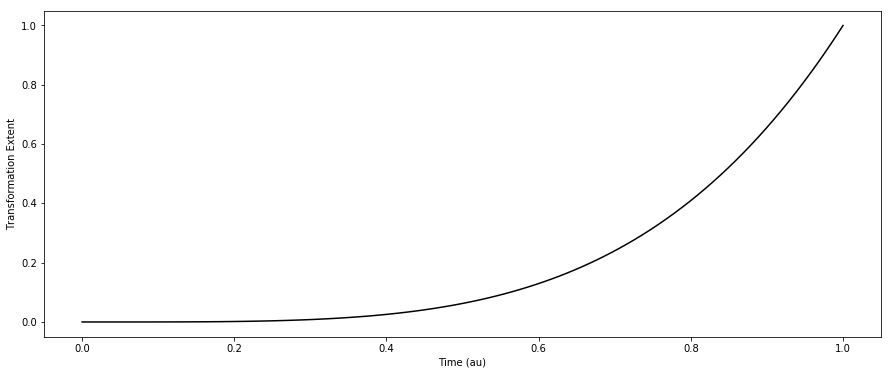

In [29]:
t = linspace(0,1,100)
def try1(t): return t**4
figure(figsize=(15,6))
plot(t,try1(t),'k')
xlabel("Time (au)")
ylabel("Transformation Extent")

Is this correct? Does it just get faster and faster 

No! Why not?

Because in a fixed volume of liquid over time, there is less material to be converted, so the absolute rate has to slow.


If we take this loss into account we can say:


$$dV_C = \frac{4}{3}\pi u^3(t-t')^3 (V-V_c)I_V(t')dt' $$

$$V_c(t) =\int_0^t \frac{4}{3}\pi u^3(t-t')^3  (V-Vc)I_V(t')dt'$$

Assume constant Growth

$$\frac{V_C}{V} = 1-e^{-\frac{\pi}{3}I_vu^3t^4} $$


==> only for the isothermal case!

Text(0,0.5,'Transformation Extent')

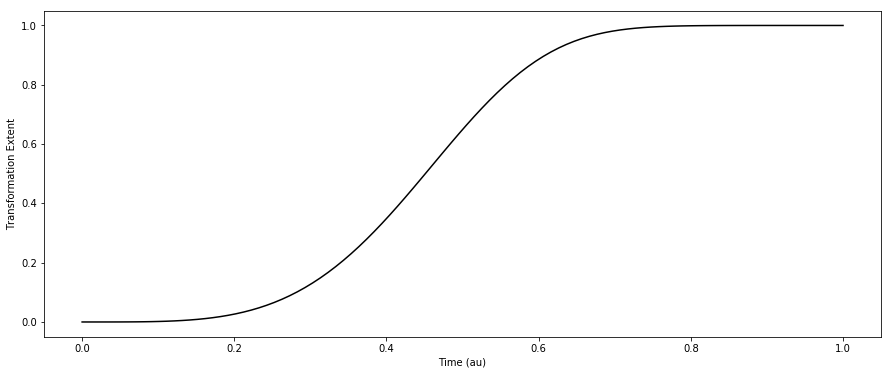

In [32]:
t = linspace(0,1,100)
u = 2 #arb
Iv = 2 #arb
figure(figsize=(15,6))

vcbyv = 1-exp(-(pi/3)*Iv*u**3*t**4)
plot(t,vcbyv,'k')
xlabel("Time (au)")
ylabel("Transformation Extent")

### Time Temperature Transformation Curves

So now we have mapped the thermodynamics and kinetics for a phase change from nucleation through growth to completion. When we solidify (as opposed to chemical deposit), we have to account for the thermal intertia of the melt (e.g. heat transfer and heat capacity) as we lower the temperature of the system to induce cooling. As we've seen, the degree of undercooling has significant consquences for both the structure of the final solid, as well as the time it takes the solid to full form.

We can collapse all of this data into what we call a Time Temperature Transformation Curve (TTT).

Below is the TTT curve for Anorthite a mixture of CaO, Al203, and SiO2


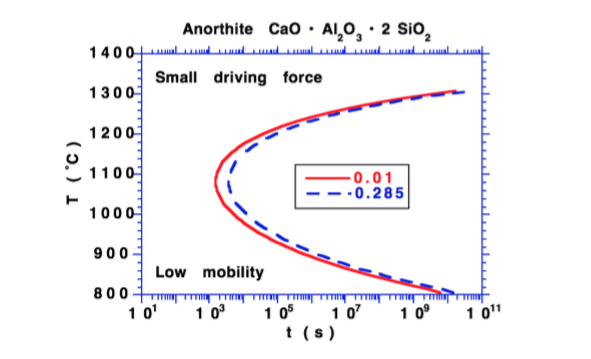

What does this mean? Let's say I bring the system to ~1300˚C. How long will I have to watch for 1% transformation? Well, it doesn't matter whether it's 1% or 28% because

In [38]:
print 10**11/(24*60*60*365),"years"

3170 years


It will take 3170 _years_ to start nucleating a solid.

The same at 800 degrees, give or take 500 years. Why is this? Is the system the "same" in either case?

Let's look a more complicated example:

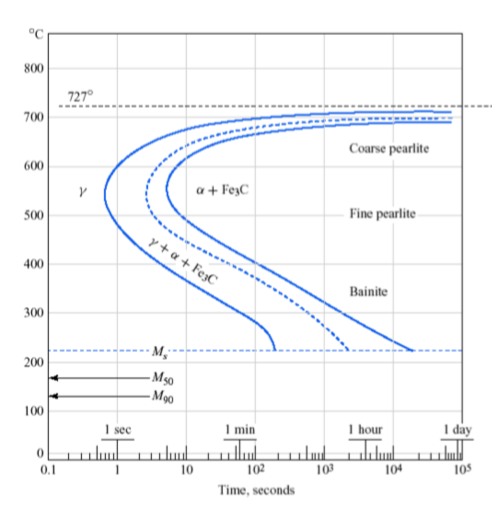

## Diffusion Controlled Growth


We haven't yet discussed how an interface under phase transformation can alter the local _composition_ on either side of the interface.

If we model the heat rejection at the surface as 

$$-K \frac{\partial T}{\partial x} = \frac{\Delta H_f u}{V_C}$$

Where, the heat of fusion must be conducted  away from an interface moving at velocity u


Does the growth rate move at a constant speed? Well we can calculate what the under cooling temperature  would need to be carry the heat away from the surface fast enough to allow the rate to be constant. It is enormous and on the order of -80C. 

In fact, we saw from our data that the temperature at the interface jumped immediately to 0˚C, so this means the interface at all reasonable undercooling in water is actually heating the majority of the bulk. 

So we have to consider two factors. The kinetics of attachment, which correlate to a heating rate, and the effective conductivity of the liquid near the interface.

We can then draw out two assymptotic cases:

1) When the heat buildup outweighs conductivity, the growth rate is very slow, and there is signficant redistribution of material at the surface 

2) When the ability to conduct heat is higher, it turns out the surface goes unstable. Why?


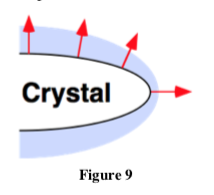

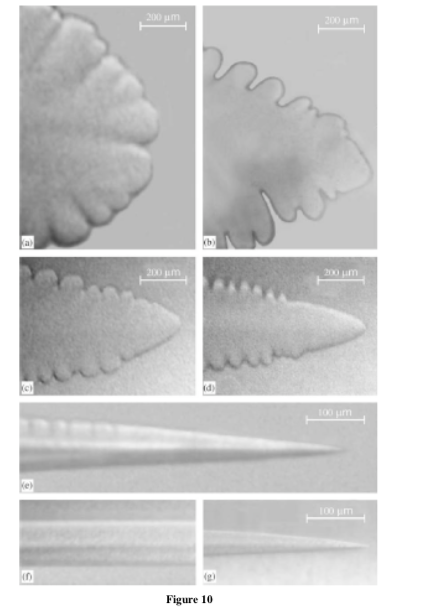


### But what about a two component mixture?

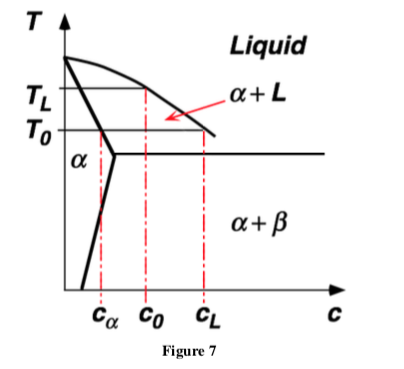

If conductiviy and diffusion are slow, we will see this happen:

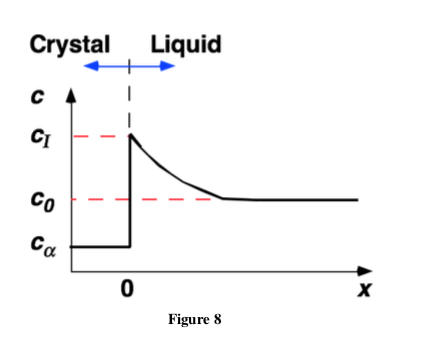



That jump at the interface is important, because it set up a non-equilibrium condition that drives the resulting structureof the system. If we linearize the solidus and liquidus lines we can write a partition co-efficient $k$, where

$$k = \frac{c_s}{c_l}$$

and the slope of the liquidus line, we will call $m$, where

$$m = \frac{dT}{dc} $$

tells us how the onset of freezing varies with local composition.

So now we have a _very_ complicated balance of interfacial heating, heat rejection, and compositional changes. We can balance this such that if

$$\frac{m c_\alpha}{D}\frac{1-k}{k}<\frac{1}{u}\frac{dT}{dx}$$

we will have a flat surface, but if

$$\frac{m c_\alpha}{D}\frac{1-k}{k}\geq\frac{1}{u}\frac{dT}{dx}$$

the surface goes unstable. 

How does stability vary 

- with m?
- with k?
- with u?


And with this, we have explored, at a very high level, how a bond forms, how a bond influences crystal structure, and how the formation of crystal structure interplays energetically and kinetically with processing conditions to control microstructure.

For the rest of the course we will explore the consequences of this microstructure.